# **Siniestros Viales**
### **1. ETL - Extracción, Transformación y Carga**

In [16]:
# Importando Librerías
import pandas as pd 
import numpy as np


### **1.1. Extracción y lectura de los datasets**

In [7]:

victimas = pd.read_excel("Datasets/homicidios.xlsx",sheet_name = "VICTIMAS")


In [8]:
victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

Se analizan las columnas con datos nulos

In [9]:
victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB


### Transformación de los datos

In [17]:
#Cambio la columna a tipo datetime
victimas["FECHA_FALLECIMIENTO"] = pd.to_datetime(victimas["FECHA_FALLECIMIENTO"], format='%Y-%m-%d', errors='coerce')

In [18]:
#Después de convertir el tipo de dato a datetime, que incluye fecha y hora completa, 
#se emplea el siguiente código para retener únicamente el formato de fecha, descartando la información de la hora.
victimas["FECHA_FALLECIMIENTO"] = victimas["FECHA_FALLECIMIENTO"].dt.date

#Posteriormente, se sustituyen las fechas que están registradas como cero con espacios en blanco, 
#facilitando así su manipulación en el conjunto de datos.
victimas["FECHA_FALLECIMIENTO"] = victimas ["FECHA_FALLECIMIENTO"].replace(pd.NaT,"")

In [19]:
#La columna de edad se modifica primero a tipo de dato numérico y posteriormente se convierte a tipo de dato entero.
victimas ["EDAD"] = pd.to_numeric(victimas["EDAD"], errors="coerce")
victimas ["EDAD"] = victimas["EDAD"].astype("Int64")

<Axes: >

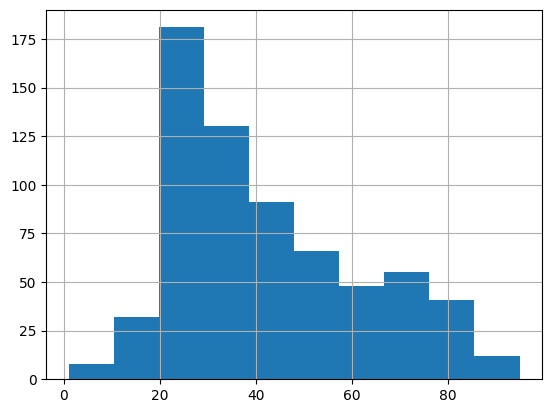

In [20]:
victimas ["EDAD"].hist()

In [21]:
#Se utiliza NumPy para remplazar con NaN aquellos valores que están ausentes o son vacíos en el conjunto de datos. 
#Luego, se convierte la columna al tipo de dato float con el propósito de evitar posibles errores al aplicar estadísticas, 
#ya que este tipo de dato puede manejar valores NaN.
victimas["EDAD"] = victimas["EDAD"].replace([" ","SD"], np.nan)

Veo necesario completar los datos de edad faltantes con el promedio para conservar la distribución general de los datos y mantener la integridad.

In [23]:
victimas["EDAD"] = victimas["EDAD"].fillna(round(victimas["EDAD"].mean()))

In [24]:
victimas ["EDAD"].unique()

<IntegerArray>
[19, 70, 30, 18, 29, 22, 16, 59, 65, 34, 41, 50, 38, 21, 52, 36, 20, 54, 42,
 56, 24, 78, 79, 26, 57, 37, 58, 23, 60, 53, 51, 40, 87, 76, 75, 35, 80, 43,
 45, 67, 27, 55, 49, 81, 25, 33, 46, 83, 39, 28,  7, 48,  4, 82, 32, 17, 47,
 61, 10, 95, 73, 84, 66, 85,  1, 15, 13, 77, 44, 31, 62, 74, 71, 11, 86, 69,
 72, 12, 63, 92, 68, 91, 64,  5, 88]
Length: 85, dtype: Int64

In [25]:
victimas.head()

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01


In [26]:
victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [27]:
victimas.columns = [x.capitalize() for x in victimas.columns]

# Se reemplazan los guiones por espacios
victimas.columns = victimas.columns.str.replace('_', ' ')
# Se renombran algunas columnas
victimas = victimas.rename(columns={'Id hecho': 'Id',
                                                      'Aaaa':'Año',
                                                      'Mm':'Mes',
                                                      'Dd':'Dia',
                                                      'Victima':'Victima'})
victimas.columns

Index(['Id', 'Fecha', 'Año', 'Mes', 'Dia', 'Rol', 'Victima', 'Sexo', 'Edad',
       'Fecha fallecimiento'],
      dtype='object')

In [28]:
victimas['Fecha fallecimiento'] = pd.to_datetime(victimas['Fecha fallecimiento'])

In [29]:
victimas

,Id,Fecha,Año,Mes,Dia,Rol,Victima,Sexo,Edad,Fecha fallecimiento
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,NaT
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02


In [30]:
victimas.to_parquet('./Data/victimas.parquet')